### Train a model with Iris data using XGBoost algorithm

Model is trained with XGBoost installed in notebook instance

In [1]:
# Install xgboost

!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 484.1 kB/s eta 0:00:0000:0100:01


In [2]:
# loading necessary libs

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
columns_list = 'iris_train_column_list.txt'
train_file = 'iris_train.csv'
validation_file = 'iris_validation.csv'

In [5]:
columns = []
with open(columns_list,'r') as f:
    columns = f.read().split(',')

In [6]:
columns

['encoded_class', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
# Specify the column names as the file does not have column header

df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names = columns)

In [12]:
# Encode class labels to integers
labels = [0,1,2]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
le = preprocessing.LabelEncoder()
le.fit(classes)

LabelEncoder()

In [13]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [14]:
df_train.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,3.9,1.2
1,2,6.1,2.6,5.6,1.4
2,2,5.8,2.8,5.1,2.4
3,0,4.4,3.2,1.3,0.2
4,2,7.2,3.6,6.1,2.5


In [15]:
df_validation.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,4.1,1.0
1,0,4.8,3.4,1.6,0.2
2,1,6.0,2.2,4.0,1.0
3,2,6.4,3.1,5.5,1.8
4,2,6.7,2.5,5.8,1.8


In [21]:
# Splitting train X and y

X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()


In [27]:
# Launch XGB classifier()

classifier = xgb.XGBClassifier(objective="multi:softmax",num_class=3,n_estimators=100,eval_metric=['mlogloss'])

In [28]:
classifier 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [25]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-mlogloss:0.73876	validation_1-mlogloss:0.74994
[1]	validation_0-mlogloss:0.52787	validation_1-mlogloss:0.55401
[2]	validation_0-mlogloss:0.38959	validation_1-mlogloss:0.42612
[3]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.34328
[4]	validation_0-mlogloss:0.22736	validation_1-mlogloss:0.29000
[5]	validation_0-mlogloss:0.17920	validation_1-mlogloss:0.24961
[6]	validation_0-mlogloss:0.14403	validation_1-mlogloss:0.22234
[7]	validation_0-mlogloss:0.11664	validation_1-mlogloss:0.20338
[8]	validation_0-mlogloss:0.09668	validation_1-mlogloss:0.18999
[9]	validation_0-mlogloss:0.08128	validation_1-mlogloss:0.18190
[10]	validation_0-mlogloss:0.06783	validation_1-mlogloss:0.17996
[11]	validation_0-mlogloss:0.05794	validation_1-mlogloss:0.18029
[12]	validation_0-mlogloss:0.05011	validation_1-mlogloss:0.18306
[13]	validation_0-mlogloss:0.04428	validation_1-mlogloss:0.18471
[14]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.18693
[15]	validation_0-mlogloss:0.03615	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [26]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)],
              eval_metric=['mlogloss'])

[0]	validation_0-mlogloss:0.73876	validation_1-mlogloss:0.74994
[1]	validation_0-mlogloss:0.52787	validation_1-mlogloss:0.55401
[2]	validation_0-mlogloss:0.38959	validation_1-mlogloss:0.42612
[3]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.34328
[4]	validation_0-mlogloss:0.22736	validation_1-mlogloss:0.29000
[5]	validation_0-mlogloss:0.17920	validation_1-mlogloss:0.24961
[6]	validation_0-mlogloss:0.14403	validation_1-mlogloss:0.22234
[7]	validation_0-mlogloss:0.11664	validation_1-mlogloss:0.20338
[8]	validation_0-mlogloss:0.09668	validation_1-mlogloss:0.18999
[9]	validation_0-mlogloss:0.08128	validation_1-mlogloss:0.18190
[10]	validation_0-mlogloss:0.06783	validation_1-mlogloss:0.17996
[11]	validation_0-mlogloss:0.05794	validation_1-mlogloss:0.18029
[12]	validation_0-mlogloss:0.05011	validation_1-mlogloss:0.18306
[13]	validation_0-mlogloss:0.04428	validation_1-mlogloss:0.18471
[14]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.18693
[15]	validation_0-mlogloss:0.03615	

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[64]	validation_0-mlogloss:0.01617	validation_1-mlogloss:0.22724
[65]	validation_0-mlogloss:0.01614	validation_1-mlogloss:0.22734
[66]	validation_0-mlogloss:0.01611	validation_1-mlogloss:0.22797
[67]	validation_0-mlogloss:0.01609	validation_1-mlogloss:0.22796
[68]	validation_0-mlogloss:0.01606	validation_1-mlogloss:0.22856
[69]	validation_0-mlogloss:0.01604	validation_1-mlogloss:0.22867
[70]	validation_0-mlogloss:0.01602	validation_1-mlogloss:0.22867
[71]	validation_0-mlogloss:0.01599	validation_1-mlogloss:0.22926
[72]	validation_0-mlogloss:0.01597	validation_1-mlogloss:0.22926
[73]	validation_0-mlogloss:0.01595	validation_1-mlogloss:0.22983
[74]	validation_0-mlogloss:0.01592	validation_1-mlogloss:0.22994
[75]	validation_0-mlogloss:0.01590	validation_1-mlogloss:0.22994
[76]	validation_0-mlogloss:0.01588	validation_1-mlogloss:0.23050
[77]	validation_0-mlogloss:0.01586	validation_1-mlogloss:0.23051
[78]	validation_0-mlogloss:0.01584	validation_1-mlogloss:0.23106
[79]	validation_0-mloglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [30]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-mlogloss:0.73876	validation_1-mlogloss:0.74994
[1]	validation_0-mlogloss:0.52787	validation_1-mlogloss:0.55401
[2]	validation_0-mlogloss:0.38959	validation_1-mlogloss:0.42612
[3]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.34328
[4]	validation_0-mlogloss:0.22736	validation_1-mlogloss:0.29000
[5]	validation_0-mlogloss:0.17920	validation_1-mlogloss:0.24961
[6]	validation_0-mlogloss:0.14403	validation_1-mlogloss:0.22234
[7]	validation_0-mlogloss:0.11664	validation_1-mlogloss:0.20338
[8]	validation_0-mlogloss:0.09668	validation_1-mlogloss:0.18999
[9]	validation_0-mlogloss:0.08128	validation_1-mlogloss:0.18190
[10]	validation_0-mlogloss:0.06783	validation_1-mlogloss:0.17996
[11]	validation_0-mlogloss:0.05794	validation_1-mlogloss:0.18029
[12]	validation_0-mlogloss:0.05011	validation_1-mlogloss:0.18306
[13]	validation_0-mlogloss:0.04428	validation_1-mlogloss:0.18471
[14]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.18693
[15]	validation_0-mlogloss:0.03615	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [31]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)],
              early_stopping_rounds=10)

[0]	validation_0-mlogloss:0.73876	validation_1-mlogloss:0.74994
[1]	validation_0-mlogloss:0.52787	validation_1-mlogloss:0.55401
[2]	validation_0-mlogloss:0.38959	validation_1-mlogloss:0.42612
[3]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.34328
[4]	validation_0-mlogloss:0.22736	validation_1-mlogloss:0.29000
[5]	validation_0-mlogloss:0.17920	validation_1-mlogloss:0.24961
[6]	validation_0-mlogloss:0.14403	validation_1-mlogloss:0.22234
[7]	validation_0-mlogloss:0.11664	validation_1-mlogloss:0.20338
[8]	validation_0-mlogloss:0.09668	validation_1-mlogloss:0.18999
[9]	validation_0-mlogloss:0.08128	validation_1-mlogloss:0.18190
[10]	validation_0-mlogloss:0.06783	validation_1-mlogloss:0.17996
[11]	validation_0-mlogloss:0.05794	validation_1-mlogloss:0.18029
[12]	validation_0-mlogloss:0.05011	validation_1-mlogloss:0.18306
[13]	validation_0-mlogloss:0.04428	validation_1-mlogloss:0.18471
[14]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.18693
[15]	validation_0-mlogloss:0.03615	

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [33]:
# Launch XGB classifier()

# added eval_metric and early_stopping_rounds in constructor itself

classifier = xgb.XGBClassifier(objective="multi:softmax",num_class=3,n_estimators=100,
                               eval_metric=['mlogloss'],
                               early_stopping_rounds=10
                              )

In [34]:
classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-mlogloss:0.73876	validation_1-mlogloss:0.74994
[1]	validation_0-mlogloss:0.52787	validation_1-mlogloss:0.55401
[2]	validation_0-mlogloss:0.38959	validation_1-mlogloss:0.42612
[3]	validation_0-mlogloss:0.29429	validation_1-mlogloss:0.34328
[4]	validation_0-mlogloss:0.22736	validation_1-mlogloss:0.29000
[5]	validation_0-mlogloss:0.17920	validation_1-mlogloss:0.24961
[6]	validation_0-mlogloss:0.14403	validation_1-mlogloss:0.22234
[7]	validation_0-mlogloss:0.11664	validation_1-mlogloss:0.20338
[8]	validation_0-mlogloss:0.09668	validation_1-mlogloss:0.18999
[9]	validation_0-mlogloss:0.08128	validation_1-mlogloss:0.18190
[10]	validation_0-mlogloss:0.06783	validation_1-mlogloss:0.17996
[11]	validation_0-mlogloss:0.05794	validation_1-mlogloss:0.18029
[12]	validation_0-mlogloss:0.05011	validation_1-mlogloss:0.18306
[13]	validation_0-mlogloss:0.04428	validation_1-mlogloss:0.18471
[14]	validation_0-mlogloss:0.03993	validation_1-mlogloss:0.18693
[15]	validation_0-mlogloss:0.03615	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['mlogloss'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [35]:
eval_result = classifier.evals_result()

In [37]:
len(eval_result['validation_0']['mlogloss'])

21

In [38]:
training_rounds = range(len(eval_result['validation_0']['mlogloss']))

In [39]:
training_rounds

range(0, 21)

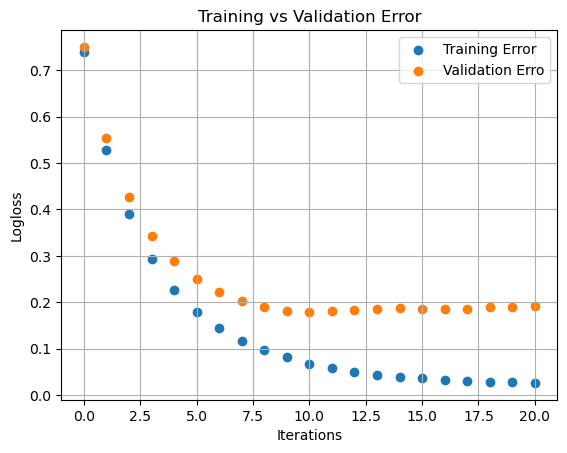

In [41]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['mlogloss'],label='Training Error')
plt.scatter(x=training_rounds, y= eval_result['validation_1']['mlogloss'],label='Validation Erro')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.title('Training vs Validation Error')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

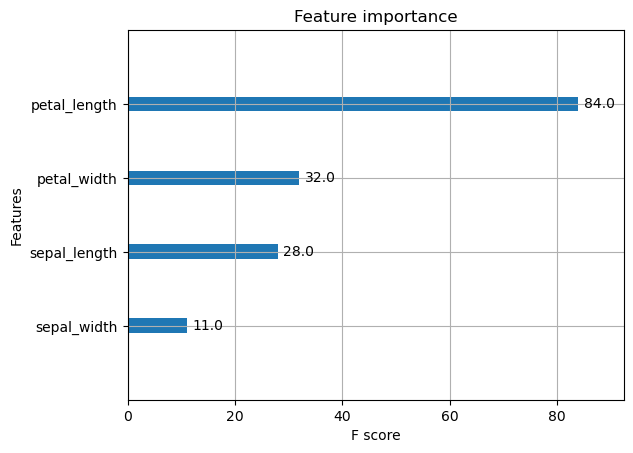

In [42]:
xgb.plot_importance(classifier)

In [43]:
df = pd.read_csv(validation_file,names=columns)

In [44]:
df.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,4.1,1.0
1,0,4.8,3.4,1.6,0.2
2,1,6.0,2.2,4.0,1.0
3,2,6.4,3.1,5.5,1.8
4,2,6.7,2.5,5.8,1.8


In [45]:
X_test =df.iloc[:,1:]
y_test = df.iloc[:,0]

In [46]:
result = classifier.predict(X_test)

In [47]:
result

array([1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 2, 2,
       1], dtype=int32)

In [48]:
df['predicted_class'] = result

In [49]:
df.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width,predicted_class
0,1,5.8,2.7,4.1,1.0,1
1,0,4.8,3.4,1.6,0.2,0
2,1,6.0,2.2,4.0,1.0,1
3,2,6.4,3.1,5.5,1.8,2
4,2,6.7,2.5,5.8,1.8,2


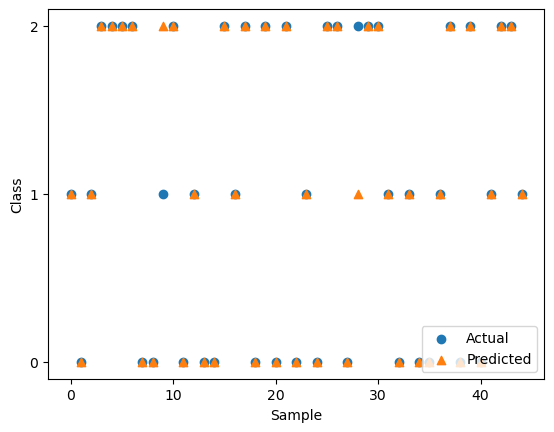

In [50]:
# Compare performance of Actual and Model 1 Prediction

plt.figure()
plt.scatter(df.index, df['encoded_class'],label='Actual')
plt.scatter(df.index, df['predicted_class'],label='Predicted',marker='^')
plt.legend(loc=4)
plt.yticks([0,1,2])
plt.xlabel('Sample')
plt.ylabel('Class')
plt.show()


### Confusion Matrix

Confusion Matrix is a table that summarizes performance of classification model

In [51]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [52]:
#  Compute confusion matrix
cnf_matrix = confusion_matrix(df['encoded_class'],
                             df['predicted_class'],
                             labels=labels)

In [53]:
cnf_matrix

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 17]])

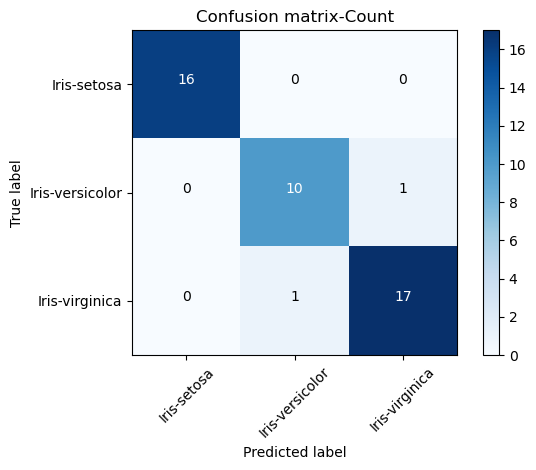

In [54]:
# Plot Confusion matrix count

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,title='Confusion matrix-Count')

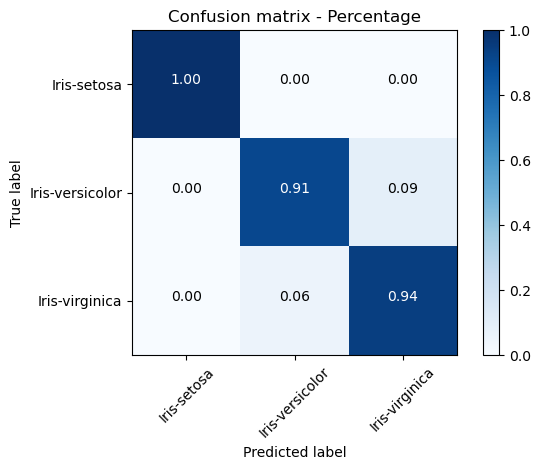

In [55]:
# Plot Confusion matrix count

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                     title='Confusion matrix - Percentage',
                     normalize=True)

In [57]:
print(classification_report(
    df['encoded_class'],
    df['predicted_class'],
    labels=labels,
    target_names = classes)
     )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

